In [1]:
#load python packages
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
#load data 
log_ins = pd.read_json('logins.json')
log_ins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
log_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Aggregate login counts based on 15 minute time intervals
log_ins_resample = log_ins.resample('15min', on='login_time').count()

In [6]:
log_ins_resample.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [12]:
df = log_ins_resample

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   login_time  9788 non-null   int64
dtypes: int64(1)
memory usage: 472.9 KB


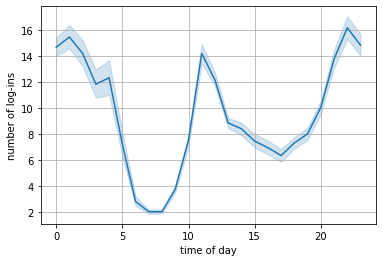

In [84]:
ax = sns.lineplot(data=df, x=df.index.hour, y='login_time')
ax.set(xlabel='time of day', ylabel='number of log-ins')
plt.grid()

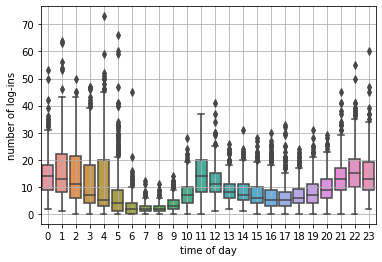

In [92]:
ax = sns.boxplot(data=df, x=df.index.hour, y='login_time')
ax.set(xlabel='time of day', ylabel='number of log-ins')
plt.grid()

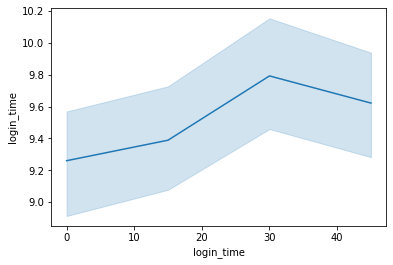

In [9]:
sns.lineplot(data=df, x=df.index.minute, y='login_time')

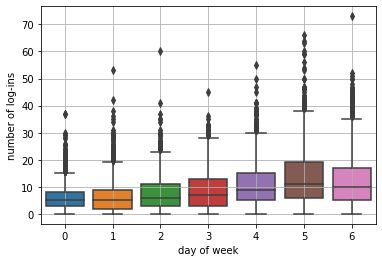

In [90]:
ax = sns.boxplot(data=df, x=df.index.dayofweek, y='login_time')
ax.set(xlabel='day of week', ylabel='number of log-ins')
plt.grid()

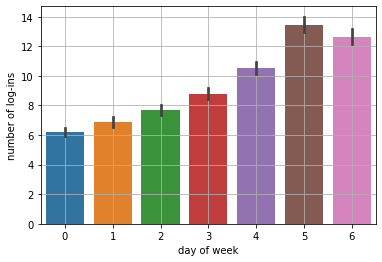

In [94]:
ax = sns.barplot(data=df, x=df.index.dayofweek, y='login_time')
ax.set(xlabel='day of week', ylabel='number of log-ins')
plt.grid()

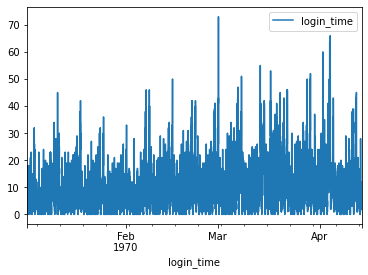

In [14]:
df.plot()

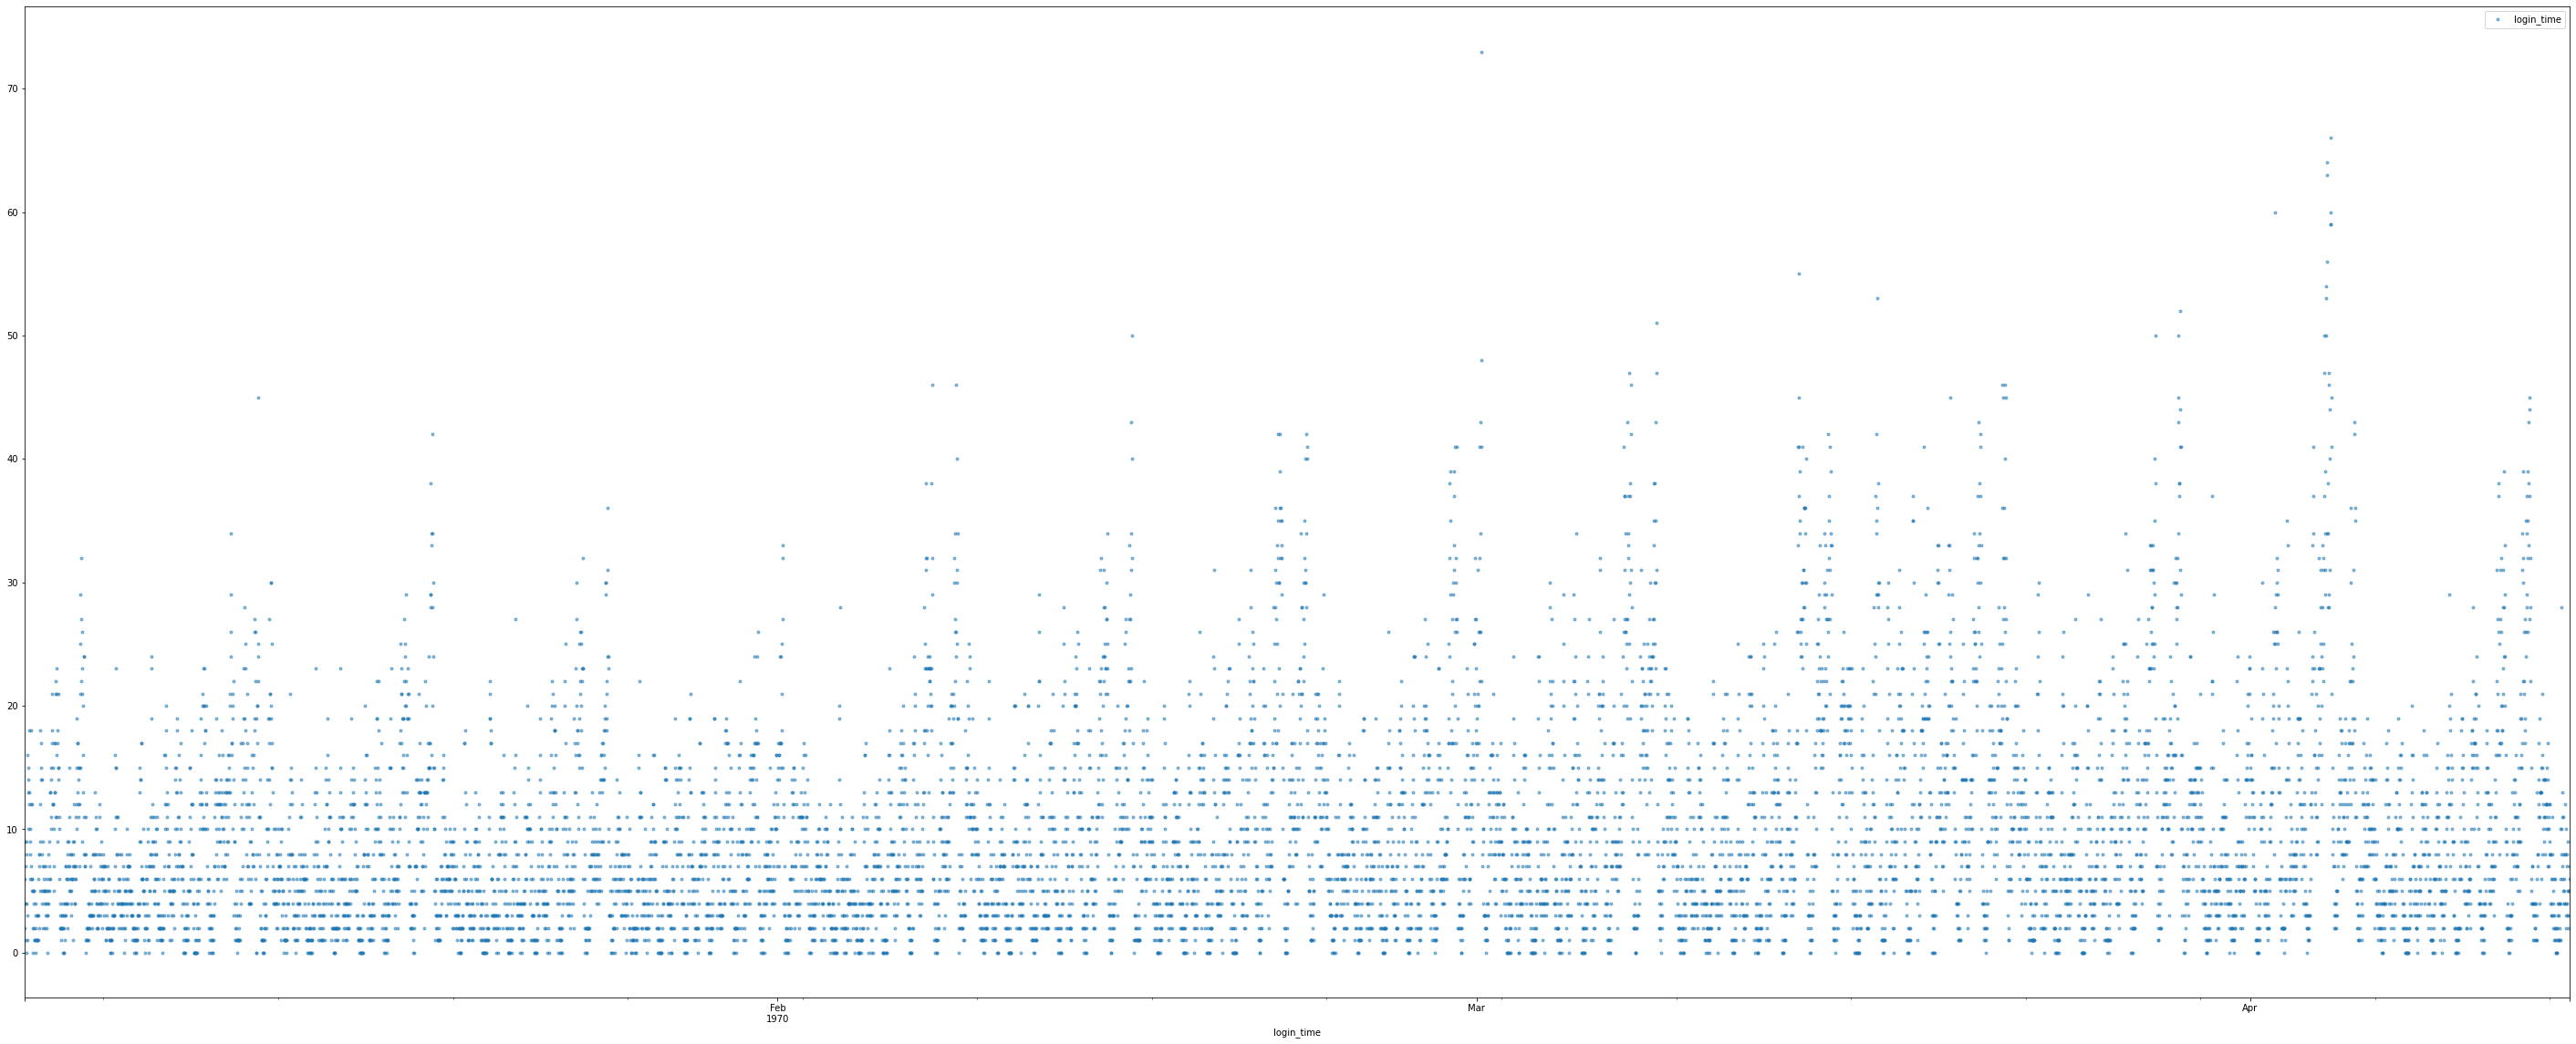

In [15]:
df.plot(marker='.', alpha=0.5, linestyle='None', figsize=(50, 20))

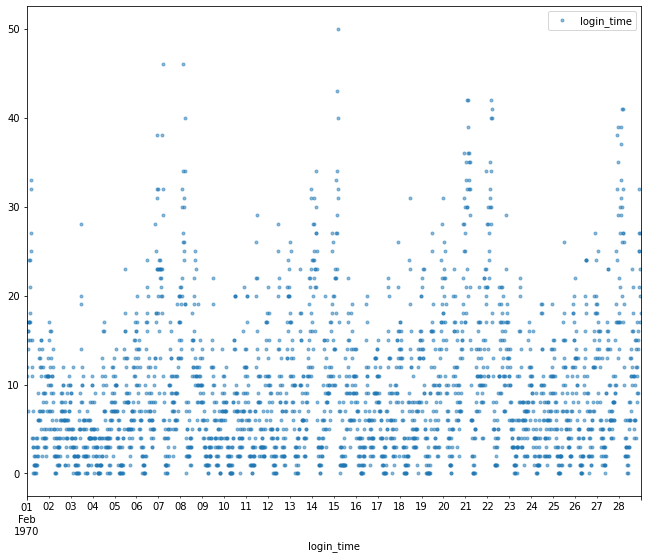

In [14]:
log_ins.loc['1970-02'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

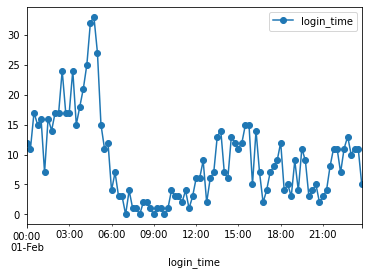

In [16]:
df.loc['1970-02-01'].plot(marker='o', linestyle='-')

In [19]:
df['time_of_day']=df.index.time

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   login_time   9788 non-null   int64 
 1   time_of_day  9788 non-null   object
dtypes: int64(1), object(1)
memory usage: 549.4+ KB


In [44]:
df.describe()

,login_time
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [57]:
df_sum = df.groupby('time_of_day').sum()
df_sum.head()

,login_time
time_of_day,
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1daf54d0>]],
      dtype=object)

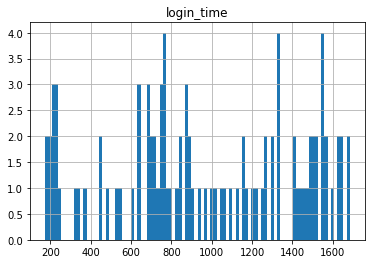

In [59]:
df_sum.hist(bins=96)

In [48]:
df_grouped = df.groupby('time_of_day').mean()
df_grouped.head()

,login_time
time_of_day,
00:00:00,14.107843
00:15:00,15.166667
00:30:00,14.950980
00:45:00,14.529412
01:00:00,15.186275


In [51]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 00:00:00 to 23:45:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   login_time  96 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cc6cf90>]],
      dtype=object)

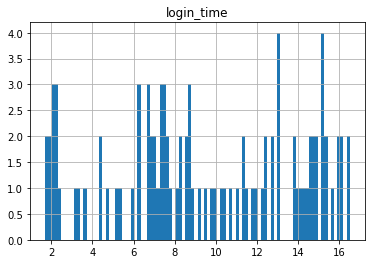

In [52]:
df_grouped.hist(bins=96)

In [63]:
d1 = log_ins_resample.copy()
d1.index = [d1.index.time, d1.index.date]
d1.head()

,,login_time,time_of_day
20:00:00,1970-01-01,2,20:00:00
20:15:00,1970-01-01,6,20:15:00
20:30:00,1970-01-01,9,20:30:00
20:45:00,1970-01-01,7,20:45:00
21:00:00,1970-01-01,1,21:00:00


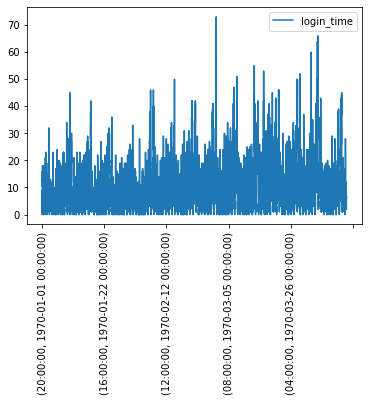

In [65]:
d1.plot(rot=90)

In [72]:
d1_mean = d1.groupby('time_of_day').mean()
d1_mean.head()

,login_time
time_of_day,
00:00:00,14.107843
00:15:00,15.166667
00:30:00,14.950980
00:45:00,14.529412
01:00:00,15.186275


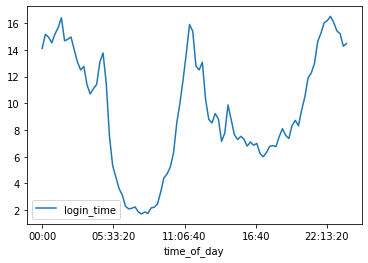

In [73]:
d1_mean.plot()

In [74]:
d1_sum = d1.groupby('time_of_day').sum()
d1_sum.head()

,login_time
time_of_day,
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549


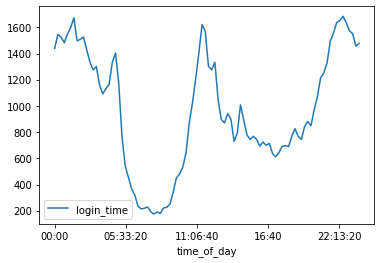

In [75]:
d1_sum.plot()

In [77]:
d1_min = d1.groupby('time_of_day').min()
d1_min.head()

,login_time
time_of_day,
00:00:00,2
00:15:00,2
00:30:00,3
00:45:00,4
01:00:00,3


In [78]:
d1_max = d1.groupby('time_of_day').max()
d1_max.head()

,login_time
time_of_day,
00:00:00,34
00:15:00,39
00:30:00,53
00:45:00,50
01:00:00,54


In [80]:
d1_all = pd.concat([d1_mean, d1_sum, d1_min, d1_max], axis=1)
d1_all.columns = ['mean', 'sum', 'min', 'max']
d1_all.head()

,mean,sum,min,max
time_of_day,,,,
00:00:00,14.107843,1439,2,34
00:15:00,15.166667,1547,2,39
00:30:00,14.950980,1525,3,53
00:45:00,14.529412,1482,4,50
01:00:00,15.186275,1549,3,54


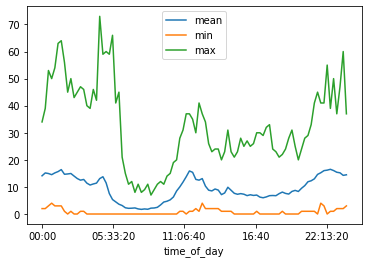

In [82]:
d1_all.drop('sum', axis=1).plot()